#### 1. Daum 뉴스기사 제목 스크래핑 하기

1-1 질문: 아래의 url에서 뉴스기사의 링크와 제목을 출력하세요.

    url = 'https://news.daum.net/economy'

In [2]:
# requests, bs4, BeautifulSoup 클래스 import
import requests
import bs4
from bs4 import BeautifulSoup

In [ ]:
# 다음 뉴스 경제 부문
url = 'https://news.daum.net/economy'
print(url)

#요청 헤더 설정 : 브라우저 정보
req_header = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
}

# requests의 get() 함수 호출
res = requests.get(url, headers= req_header)
res.encoding = 'utf-8' #인코딩 설정
print(res)
print(type(res))
print(res.status_code, res.ok)

# 응답(response)이 OK 이면
if res.ok:
    # 응답 (response)에서 text 추출 - 마우스 우클릭 source 보기
    html = res.text
    
    # BeautifulSoup 객체 생성  
    soup = BeautifulSoup(html,'html.parser')
    
    #CSS 선택자
    print(len(soup.select('ul.list_newsheadline2 li')))
    li_tag_list = soup.select("ul.list_newsheadline2 li")
    print(type(li_tag_list))
    
    # li 태그 리스트 순회하기기
    for li_tag in soup.select('ul.list_newsheadline2 li'):
        a_tag = li_tag.find('a')
        link = a_tag['href'] #링크는 a tag에 존재
        print(link)
        strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')
        title = strong_tag.text #title은 strong tag에 존재재
        print(title)
        
else:
    # 응답(response)이 Error 이면 status code 출력  
    print(f'에러 코드 = {res.status_code}')     

https://news.daum.net/economy
<Response [200]>
<class 'requests.models.Response'>
200 True
9
<class 'bs4.element.ResultSet'>
https://v.daum.net/v/20250408174344325
메디젠휴먼케어, "23andMe 파산..한국 유전체 산업의 위기 아닌 기회"
https://v.daum.net/v/20250408174234298
돈 쓸곳 많은데···나라살림 적자 또 100조 넘어
https://v.daum.net/v/20250408173713085
칩 확보서 데이터센터까지···전 산업에 'AI 고속도로' 깔아야
https://v.daum.net/v/20250408173626057
77년 묵은 정부조직, 데이터 중심 대수술···'AI 부총리' 도입을
https://v.daum.net/v/20250408172845794
[이슈ON] 마은혁 받고 '윤 절친' 이완규 투입...한덕수는 왜?
https://v.daum.net/v/20250408161553109
트럼프발 주가폭락에 동아 "경제적 핵전쟁" 조선 "금융위기 후 최악"
https://v.daum.net/v/20250408160526681
공황과 격변의 판도라 박스가 열리다
https://v.daum.net/v/20250408154329660
해외서 발 뺀 이중항체, 韓 기업들이 이끈다
https://v.daum.net/v/20250408153003030
탄핵 끝났는데 韓경제 ‘봄’은 언제 오나…박근혜 때와 다른 이유


1-2 질문:  여러개의 section 중 하나를 선택해서 url에서 뉴스기사의 링크와 제목을 출력하는 코드를 함수로 작성하기
    
    # 경제 뉴스 URL
    url = 'https://news.daum.net/economy'
    # 사회 뉴스 URL
    url = 'https://news.daum.net/society'


In [16]:
import requests
from bs4 import BeautifulSoup

section_dict = {
    "기후/환경": "climate",
    "사회": "society",
    "경제": "economy",
    "정치": "politics",
    "국제": "world",
    "문화": "culture",
    "생활": "life",
    "IT/과학": "tech",
    "인물": "people",
}

# 함수 선언
def print_news(sid):
    section = section_dict.get(sid)
    if section is None:
        print('요청하신 뉴스 주소가 없습니다.')
    
    else:
        
        url = f"https://news.daum.net/{section}"
        print(f"====> {url} {sid} 뉴스 <====")
        
        #요청 헤더 설정 : 브라우저 정보
        req_header = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
        }

        # requests의 get() 함수 호출
        res = requests.get(url, headers= req_header)
        res.encoding = 'utf-8' #인코딩 설정
        
        # 응답(response)이 OK 이면
        if res.ok:
            # 응답 (response)에서 text 추출 - 마우스 우클릭 source 보기
            html = res.text
            
            # BeautifulSoup 객체 생성  
            soup = BeautifulSoup(html,'html.parser')
            
            #CSS 선택자
            li_tag_list = soup.select("ul.list_newsheadline2 li")
        
            # li 태그 리스트 순회하기기
            for li_tag in soup.select('ul.list_newsheadline2 li'):
                a_tag = li_tag.find('a')
                link = a_tag['href'] #링크는 a tag에 존재
                print(link)
                strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')
                title = strong_tag.text #title은 strong tag에 존재재
                print(title)
        else:
            # 응답(response)이 Error 이면 status code 출력  
            print(f'에러 코드 = {res.status_code}')     

In [13]:
print_news("경제")
print_news("사회")

====> https://news.daum.net/economy 경제 뉴스 <====
https://v.daum.net/v/20250409095612972
회사는 주주만의 것? 상법 개정이 품은 위험
https://v.daum.net/v/20250409095604965
발의자가 설명하는 ‘상법 왜 바꿨나’
https://v.daum.net/v/20250409095558958
K밸류업 외치는 사이, 무너지는 한국 제조업
https://v.daum.net/v/20250409095110733
[친절한 경제] 초고령 사회 진입…'정년 연장'보다 필요한 근로 형태는?
https://v.daum.net/v/20250409094730569
3월 취업자 19.3만 늘었지만…청년·건설·제조업 '고용한파' 지속(종합)
https://v.daum.net/v/20250409093301936
투심 끊긴 CBD 오피스…"이 값엔 못 팔아" 잇단 매각 철회도
https://v.daum.net/v/20250409091935326
‘회복’이라는 착시.. “청년은 떠났고, 일터는 비어 있다”
https://v.daum.net/v/20250409091646199
[뉴스UP] 미국, 오늘부터 25% 상호관세...뭐가 어떻게 바뀌나?
https://v.daum.net/v/20250409081220033
[美 관세대응]수출바우처 1000억·긴급경영자금 2500억…남미로 수출다변화
====> https://news.daum.net/society 사회 뉴스 <====
https://v.daum.net/v/20250409095855095
'동덕여대 시위'와 '서부지법 폭동'이 같다는 당신에게[동덕여대생이 직접 말한다]
https://v.daum.net/v/20250409094519491
‘이러다 우리만 유급?’ 의대 선배 복귀에 속타는 예과생들 [세상&]
https://v.daum.net/v/20250409094432437
청소년 자살, 외면할 수 없는 사회적 책임… ‘함께고워크’로 희망 전한다
http

In [14]:
#추가적으로 인물 뉴스도 출력해보기
print_news("인물")

====> https://news.daum.net/people 인물 뉴스 <====
https://v.daum.net/v/20250409090923890
“딸 두면 비행기 탄다더라”… 여행준비가 즐겁고 더 화기애애[사랑합니다]
https://v.daum.net/v/20250409060010711
[무늬가 있는 삶] 읽다가 길을 발견하다…개그맨 작가 고명환 | 전원생활
https://v.daum.net/v/20250409002427134
"성공? 하버드 아닌 한국 식료품점서 답 찾았다" [안혜리의 인생]
https://v.daum.net/v/20250408175217633
"모든 보도는 본질적으로 탐사보도, 주변에 관심 가져야"
https://v.daum.net/v/20250408175038567
기자·가수 겸업… 펜과 마이크로 방글라데시 삶 그리다
https://v.daum.net/v/20250408173634060
"제자에 패한 뒤 무관 전락···부모상 같은 고통이었죠"
https://v.daum.net/v/20250408162102294
대장장이가 제 직업입니다, 저는 그게 자랑스럽습니다
https://v.daum.net/v/20250408092113275
소쿠리를 소꼬리로 잘못 알아듣고… 몸보신 얘기에 웃음만발[사랑합니다]
https://v.daum.net/v/20250408080901962
한국 발레 전성기 만든 최태지가 아직도 꾸는 꿈
https://v.daum.net/v/20250408043126944
[가만한 당신] 냉전 체스 판의 '폰'이기를 거부한 체스 챔프
https://v.daum.net/v/20250405050216058
[단독] 언더우드의 110년 전 편지… “한국인은 고등 교육 받을 준비 돼 있다”
https://v.daum.net/v/20250403060005274
③목숨 건 ‘뿌리 찾기’···벽 앞에 울다[생사고투]
https://v.daum.net/v/20250402164120082
종교를 초월한 인연…‘인천 봉사왕’ 故장성철씨 

In [ ]:
print_news("경제2") #잘못된 input을 주었을 때

요청하신 뉴스 주소가 없습니다.


#### 2. Nate 뉴스기사 제목 스크래핑하기

In [19]:
import requests
from bs4 import BeautifulSoup

section_dict = {
    100: "최신뉴스",
    200: "정치",
    300: "경제",
    400: "사회",
    500: "세계",
    600: "IT/과학"
}


def print_news(sid):
    section = section_dict[sid]
    if sid == 100:
        url = f"https://news.nate.com/recent?mid=n0{sid}"
        print(f"====> {url} {section} 뉴스 <====")
        
    else:    
        url = f"https://news.nate.com/section?mid=n0{sid}"
        print(f"====> {url} {section} 뉴스 <====")
    
    # 요청 헤더 설정 : 브라우저 정보
    req_header = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"
    }
    
    # requests의 get() 함수 호출
    res = requests.get(url, headers= req_header)

    # 응답(response)이 OK 이면
    if res.ok:
        # 응답에서 text 추출
        html = res.text
        
        # BeautifulSoup 객체 생성  
        soup = BeautifulSoup(html,'html.parser')
        
        # CSS 선택자
        li_tag_list = soup.select('ul.mduList1 li')
        
        for li_tag in soup.select('ul.mduList1 li'):
            a_tag = li_tag.find('a')
            link = a_tag['href']
            print(f'https:{link}')
            title = a_tag.text.strip()
            print(title)
        
    else:
        # 응답(response)이 Error 이면 status code 출력  
        print(f'에러 코드 = {res.status_code}')  
    


In [20]:
print_news(200)

====> https://news.nate.com/section?mid=n0200 정치 뉴스 <====
https://news.nate.com/view/20250409n18671?mid=n0200
계엄 직후 "사인으로 돌아가겠다"던 이완규, 이제는 '사퇴 거부'
https://news.nate.com/view/20250409n16081?mid=n0200
논란의 이완규 알고보니…노무현과 붙었던 바로 그 검사
https://news.nate.com/view/20250409n14064?mid=n0200
'헌법재판관 지명' 이완규, 野 사퇴 요구에 "권한대행 결정 존중"
https://news.nate.com/view/20250409n13547?mid=n0200
안가회동, 尹 장모 변호까지…韓  이완규 기습 지명에 학계 뜨거운 논란 [세...
https://news.nate.com/view/20250409n14240?mid=n0200
[속보]이완규 "한덕수 '지명 결정' 존중···권한대행도 할 수 있어"
https://news.nate.com/view/20250409n13315?mid=n0200
[속보] '헌재 재판관 지명' 이완규 "권한대행 결정 존중할 따름"
https://news.nate.com/view/20250409n12684?mid=n0200
이재명, 대표직 사퇴…"국민과 함께하겠다" 대선 출마 수순
https://news.nate.com/view/20250409n11501?mid=n0200
[속보] 이재명, 대표직 사퇴…"새로운 일 시작" 대선출마 수순
https://news.nate.com/view/20250409n12142?mid=n0200
이재명 "새로운 일 시작" 대표직 사퇴…이르면 내일 출마선언
https://news.nate.com/view/20250409n10978?mid=n0200
[속보] 이재명 "오늘이 마지막"…민주당 대표직 사퇴 선언
https://news.nate.com/view/20250409n01044?mid=n0200
[단독]이

In [21]:
print_news(500)

====> https://news.nate.com/section?mid=n0500 세계 뉴스 <====
https://news.nate.com/view/20250409n13198?mid=n0500
도미니카공화국 클럽 붕괴로 60명 이상 사망…한국인 피해는 없어
https://news.nate.com/view/20250409n08208?mid=n0500
도미니카공화국 클럽 지붕붕괴 참사···"최소 66명 사망"
https://news.nate.com/view/20250409n04094?mid=n0500
도미니카공화국서 나이트클럽 지붕붕괴 참사…"최소 58명 사망"(종합2보)
https://news.nate.com/view/20250409n12595?mid=n0500
"관세는 불법"…美 상공회의소 등, 트럼프에 소송전 검토
https://news.nate.com/view/20250409n01169?mid=n0500
백악관 "中 보복은 실수…9일 0시1분부터 104% 관세 부과"(종합)
https://news.nate.com/view/20250408n17797?mid=n0500
트럼프 엄포에 중국 맞불…'관세 쓰나미' 폭풍전야 전세계 패닉
https://news.nate.com/view/20250408n11345?mid=n0500
中, 트럼프 50% 추가관세 위협에 "잘못에 잘못 더해…단호히 반격"
https://news.nate.com/view/20250408n17257?mid=n0500
'치킨게임' 미중, 무역전면전 확전하나…'관세폭탄 공방' 가속
https://news.nate.com/view/20250408n04092?mid=n0500
"빌어먹을 계산법"…'트럼프 지지' 억만장자들, 관세 맹비난
https://news.nate.com/view/20250408n24356?mid=n0500
머스크, 트럼프 상호관세 만류했었다…'헤어질 결심' 주목
https://news.nate.com/view/20250408n25079?mid=n0500
화성 간다더니 "달 먼저

2-1. Nate 뉴스기사 이미지 스크래핑하기

====> 최신뉴스 <====
'세 경기 무실점' 김천, 수원FC 누르고 3연승 달린다
https://news.nate.com/view/20250409n34248?mid=n0100
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/sk/2025/04/09/SK004_20250409_020601.jpg


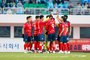

軍 "무인기·헬기 충돌사고, '돌풍' 등 외부요인 때문" 결론
https://news.nate.com/view/20250409n34247?mid=n0100
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/04/09/7184417_high.jpg


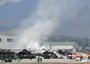

"아이 낳았어요" 한마디면 OK···남성 육아휴직 사용률 '100%' 그 기업 어디?
https://news.nate.com/view/20250409n31659?mid=n0100
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/se/2025/04/09/2GRGET4HKP_2.jpg


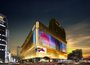

====> 정치 <====
"부동산PF 건전성 강화"…다올·SK증권 등 소형사, NCR 리스크 가중
https://news.nate.com/view/20250409n34203?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mw/2025/04/09/2025040917214488836_1.jpg


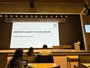

'한덕수 월권을 막아라'…쏟아지는 법률적 방패들
https://news.nate.com/view/20250409n33732?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/oh/2025/04/09/IE003440594_STD.jpg


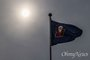

한덕수 권한대행 향해 헌법재판관 지명 철회 촉구하는 野 초선들
https://news.nate.com/view/20250409n29998?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/04/09/7226856_high.jpg


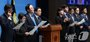

====> 경제 <====
"부동산PF 건전성 강화"…다올·SK증권 등 소형사, NCR 리스크 가중
https://news.nate.com/view/20250409n34203?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mw/2025/04/09/2025040917214488836_1.jpg


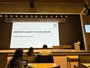

'한덕수 월권을 막아라'…쏟아지는 법률적 방패들
https://news.nate.com/view/20250409n33732?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/oh/2025/04/09/IE003440594_STD.jpg


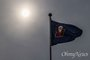

한덕수 권한대행 향해 헌법재판관 지명 철회 촉구하는 野 초선들
https://news.nate.com/view/20250409n29998?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/04/09/7226856_high.jpg


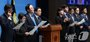

====> 사회 <====
"부동산PF 건전성 강화"…다올·SK증권 등 소형사, NCR 리스크 가중
https://news.nate.com/view/20250409n34203?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mw/2025/04/09/2025040917214488836_1.jpg


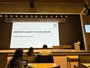

'한덕수 월권을 막아라'…쏟아지는 법률적 방패들
https://news.nate.com/view/20250409n33732?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/oh/2025/04/09/IE003440594_STD.jpg


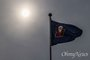

한덕수 권한대행 향해 헌법재판관 지명 철회 촉구하는 野 초선들
https://news.nate.com/view/20250409n29998?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/04/09/7226856_high.jpg


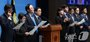

====> 세계 <====
"부동산PF 건전성 강화"…다올·SK증권 등 소형사, NCR 리스크 가중
https://news.nate.com/view/20250409n34203?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mw/2025/04/09/2025040917214488836_1.jpg


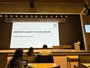

'한덕수 월권을 막아라'…쏟아지는 법률적 방패들
https://news.nate.com/view/20250409n33732?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/oh/2025/04/09/IE003440594_STD.jpg


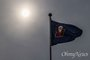

한덕수 권한대행 향해 헌법재판관 지명 철회 촉구하는 野 초선들
https://news.nate.com/view/20250409n29998?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/04/09/7226856_high.jpg


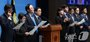

====> IT/과학 <====
"부동산PF 건전성 강화"…다올·SK증권 등 소형사, NCR 리스크 가중
https://news.nate.com/view/20250409n34203?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/mw/2025/04/09/2025040917214488836_1.jpg


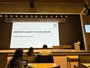

'한덕수 월권을 막아라'…쏟아지는 법률적 방패들
https://news.nate.com/view/20250409n33732?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/oh/2025/04/09/IE003440594_STD.jpg


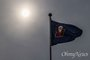

한덕수 권한대행 향해 헌법재판관 지명 철회 촉구하는 野 초선들
https://news.nate.com/view/20250409n29998?mid=n0000
https://thumbnews.nateimg.co.kr/news90///news.nateimg.co.kr/orgImg/na/2025/04/09/7226856_high.jpg


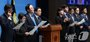

In [49]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display

# 섹션 리스트
sections = {
    "최신뉴스": "n0100",
    "정치": "n0200",
    "경제": "n0300",
    "사회": "n0400",
    "세계": "n0500",
    "IT/과학": "n0600",
}

url = "https://news.nate.com/recent?mid="

req_header = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"
}

# 각 섹션마다 스크래핑
for name, code in sections.items():
    print(f"====> {name} <====")
    url = url + code
    res = requests.get(url, headers=req_header)

    soup = BeautifulSoup(res.text, "html.parser")

    # 기사 div 추출
    news_items = soup.select("div.mlt01")

    for item in news_items[:3]:  # 섹션 당 3개 기사만 출력
        a_tag = item.select_one("a.lt1")
        title_tag = a_tag.select_one("h2.tit")
        img_tag = a_tag.select_one("img")

        title = title_tag.text.strip()
        link = urljoin("https://news.nate.com", a_tag["href"])

        print(title)
        print(link)

        if img_tag:
            img_url = urljoin("https:", img_tag["src"])
            print(img_url)
            display(Image(img_url))


2-2. 하나의 네이버 웹툰과 1개의 회차에 대한 Image 다운로드 하기

In [37]:
import requests
from bs4 import BeautifulSoup
import os

def download_one_episode(title, no, url):
    
    req_header = {
        'referer': url
    }

    res = requests.get(url)
    if res.ok:
        soup = BeautifulSoup(res.text, 'html.parser')
        img_tags = soup.select("img[src*='IMAG01']")
        
        img_url_list = [img['src'] for img in img_tags]
        imgdir_name = os.path.join('img', title, str(no))
        if not os.path.isdir(imgdir_name):
            os.makedirs(imgdir_name)

        # 이미지 다운로드 및 저장
        for img_url in img_url_list:
            res = requests.get(img_url, headers=req_header)
            if res.ok:
                img_data = res.content
                file_name = os.path.basename(img_url)
                file_path = os.path.join(imgdir_name, file_name)
                with open(file_path, 'wb') as file:
                    file.write(img_data)
                print(f'Writing to {file_path} ({len(img_data):,} bytes)')
            else:
                print(f'Error Code = {res.status_code}')
    else:
        print(f'Error Code = {res.status_code}')

In [38]:
download_one_episode('낢이사는이야기', '48', 'https://comic.naver.com/webtoon/detail?titleId=833255&no=49&week=tue')

Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_1.jpg (166,289 bytes)
Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_2.jpg (117,581 bytes)
Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_3.jpg (175,647 bytes)
Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_4.jpg (140,295 bytes)
Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_5.jpg (115,277 bytes)
Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_6.jpg (86,840 bytes)
Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_7.jpg (151,280 bytes)
Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_8.jpg (146,198 bytes)
Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_IMAG01_9.jpg (86,460 bytes)
Writing to img\낢이사는이야기\48\20250310103947_792197c569e377c7f369fe9d6f2bd961_I